# Exercise 1
## PART A: Word Count Program

Using "random_text.txt" we want to find the number of unique non-stop words and the top 5 most frequent words. We can use the "ntlk" package to import stop words so that we can remove the list from the text.  After we have done this we'll find that there are a total of 46 unique non-stop words and the 5 most frequent words are "in", "sed", "ante", "eu", and "at".


In [1]:
## The first thing we want to do is import the necessary libraries so that we can analyze the text and identify the stop words within it

import nltk
from nltk.corpus import stopwords   

In [76]:
## Next we need to come up with a function that tokenizes the words and takes care of some text preprocessing

def tokenizetext():
    with open('random_text.txt', 'r') as input:
        ## basic text preprocessing to enable tokenization, e.g. removing punctuation and getting rid of spaces between paragraphs
        content = input.read()
        content = content.replace(",","")
        content = content.replace(".","")
        content = content.replace("\n", " ")
        content = content.replace("  ", " ")
        content = content.lower()
        global tokens
        ## split the words into individual tokens by using spaces 
        tokens = content.split(" ")
        ## creating a dictionary with the tokens so that we can see how often every word occurs 
        global dictionary
        dictionary = {}        
        for token in tokens:
            ## if the word isn't already in the dictionary then we make its value 1
            if token not in dictionary:
                dictionary[token] = 1
            ## if the word is in the dictionary then we add one to its value so that we can count how many times the word occurs
            else:
                dictionary[token] = dictionary[token] + 1

tokenizetext()
## This is just to check that I obtained the correct number of tokens with the above function 
len(tokens)

449

In [77]:
## Then we can come up with a function that reorders the dict created in the first function so that we can see the 5 most frequent words

def most5freq():
    ## use sorted() with reverse=True since we want to know what the 5 most frequent words are
    sort_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
    ## then we want to extract the first 5 entries in our sorted dictionary which requires converting the dictionary into a list
    first5pairs = {k for k in list(sort_dict)[:5]}
    print(first5pairs)
    ## we can check that the right words were returned by printing out the full sorted dictionary 
    for i in sort_dict:
        print(i[0], i[1])
     

most5freq()

{('eu', 9), ('ante', 9), ('in', 12), ('at', 9), ('sed', 12)}
in 12
sed 12
ante 9
eu 9
at 9
sit 8
amet 8
elit 8
non 8
donec 7
eget 6
vel 6
nunc 6
nec 6
lectus 6
ut 6
mauris 6
vitae 5
finibus 5
enim 5
id 5
convallis 5
euismod 5
dolor 4
consectetur 4
feugiat 4
augue 4
urna 4
ex 4
tellus 4
iaculis 4
molestie 4
duis 4
diam 4
tincidunt 4
metus 4
commodo 4
risus 4
fusce 4
condimentum 4
interdum 4
nisl 4
rutrum 4
vestibulum 4
ornare 4
nullam 4
tempor 4
sagittis 4
lorem 3
maximus 3
libero 3
maecenas 3
orci 3
lacus 3
efficitur 3
luctus 3
volutpat 3
et 3
ultricies 3
tortor 3
placerat 3
justo 3
varius 3
pellentesque 3
facilisis 3
suscipit 3
tristique 3
felis 3
lobortis 3
a 3
ligula 3
nulla 3
dui 3
dignissim 3
aliquam 3
ipsum 2
eleifend 2
pharetra 2
ac 2
cras 2
imperdiet 2
leo 2
auctor 2
massa 2
mi 2
magna 2
hendrerit 2
odio 2
quisque 2
pretium 2
velit 2
semper 2
mollis 2
sem 2
aenean 2
venenatis 2
nisi 2
nam 2
dapibus 2
faucibus 2
sodales 2
accumsan 2
est 2
blandit 2
tempus 2
adipiscing 1
erat 1
m

In [81]:
 ## Lastly we want to find words in the dictionary which are not stopwords and which occur only once

def unique_nonstopwords(): 
    ## I made a new dictionary using the same process that I used for the first dictionary except this time I removed the stopwords from the tokens
    stop_words = set(stopwords.words('english'))
    remove_sw = [word for word in tokens if not word in stop_words]
    filtered_dict = {}        
    for token in tokens:
            if token not in filtered_dict:
                filtered_dict[token] = 1
            else:
                filtered_dict[token] = filtered_dict[token] + 1
    ## then I created a variable 'result' which will hold the count of the number of elements in the non-stopword dictionary that have a value equal to one 
    result = 0
    ## this for loop adds one to the 'result' for every dictionary entry that occurs only once i.e. every entry that is unique
    for key in filtered_dict:
        if filtered_dict[key] == 1:
            result = result + 1
    print(result)
    
unique_nonstopwords()

46


# Exercise 1
## PART B: Image Blurring w/ numpy
Using numpy matrices, we want to implement an image blurring program.

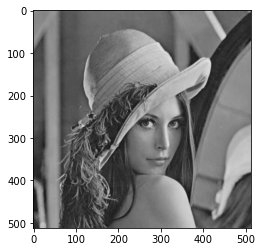

In [45]:
## First we want to import the necessary libraries and the image we want to work on

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
img = mpimg.imread('lena_gray.jpg')
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)

In [83]:
## I first created a 3x3 matrix of just ones and I then multiplied it by 1/9 to obtain the filter specified in the assignment 
filtr = np.ones((3,3))
filtr = (1/9)*filtr
filtr

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [47]:
## I then created a pad() function that I could use to pad the image with ones on all sides 
## This code is heavily based on the numpy tutorial at https://numpy.org/doc/stable/reference/generated/numpy.pad.html 
def pad(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 1)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value 
    
padded_img = np.pad(img, 1, pad)
## I then printed the new image matrix to verify that all sides are surrounded by ones 
padded_img


array([[  1,   1,   1, ...,   1,   1,   1],
       [  1, 144, 143, ..., 135, 110,   1],
       [  1, 145, 144, ..., 128, 104,   1],
       ...,
       [  1,  39,  41, ...,  87,  88,   1],
       [  1,  40,  42, ...,  87,  89,   1],
       [  1,   1,   1, ...,   1,   1,   1]], dtype=uint8)

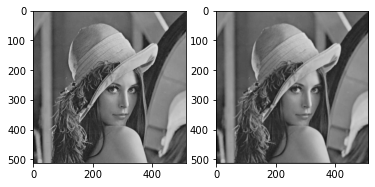

In [82]:
## Convolve the filter over the given image
## Plot the original and blurred images side by side

## First I created a function to multiply the padded image with the filter
def multiply(img, f):
    sum_mult = 0;
    for i in range(len(f)):
        for j in range(len(f[0])):
            ## the variable 'sum_mult' adds the multiplication of every element in f with a matrix of the same size in img
            sum_mult += img[i][j]*f[i][j]
    return sum_mult

## Then I created a function that blurs the image using the multiply function I created above
def blur(padded_image):
    result = []
    ## The first two for loops create a matrix of zeros the size of the image without the padding
    for i in range(1, len(padded_image) - 1):
        temp = []
        for j in range(1, len(padded_image[0]) - 1):
            temp.append(0)
        result.append(temp)
    ## Then the next two for loops move over the image and pick a 3x3 matrix from the padded image
    ## This is then element-wise multiplied with the filter
    ## That gives me the next pixel value that I now store in the result matrix from above, replacing the zeros
    for i in range(1, len(padded_image) - 1):
        for j in range(1, len(padded_image[0]) - 1):
            ## I create a matrix the same size as the original image so as to ensure that I don't place a border on the image
            padded_matrix = padded_image[i-1:i+2,j-1:j+2]
            result[i-1][j-1] = multiply(padded_matrix,filtr)
    return result

## This code prints the two images side by side by assigning them to 2 spaces on an image plot                    
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.subplot(1, 2, 2)
plt.imshow(blur(padded_img), cmap = 'gray', vmin = 0, vmax = 255)


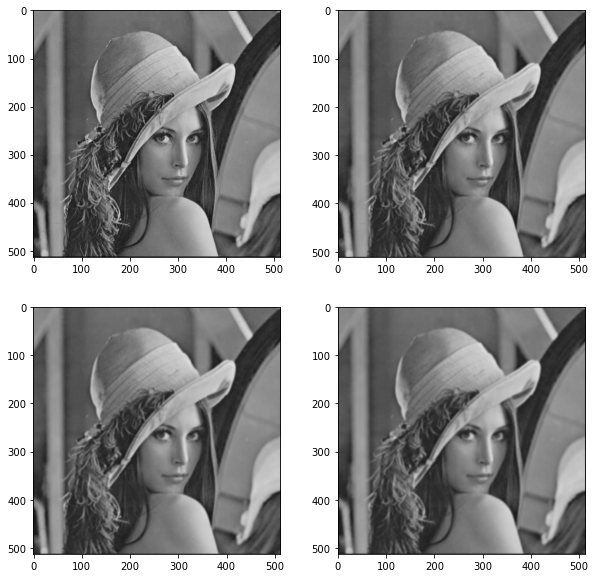

In [49]:
## Now we need to examine the result of applying the filter multiple times.

## Here I used the blur function that I created earlier so that I could run the filter over the image multiple times
blur_one = blur(padded_img)
blur_two = blur(np.pad(blur_one, 1, pad))
blur_three = blur(np.pad(blur_two, 1, pad))
## In order for the images to show up side by side I specified where they would show up on an image plot
## I also increased the size so that the blurring would be easier to recognize
f, axs = plt.subplots(2,2, figsize=(10,10))
axs[0][0].imshow(padded_img, cmap = 'gray', vmin = 0, vmax = 255)
axs[0][1].imshow(blur_one, cmap = 'gray', vmin = 0, vmax = 255)
axs[1][0].imshow(blur_two, cmap = 'gray', vmin = 0, vmax = 255)
axs[1][1].imshow(blur_three, cmap = 'gray', vmin = 0, vmax = 255)

# Exercise 2
## Linear Regression

In [104]:
## Import the necessary libraries first
## Then generate a simple matrix X with dimensions 100×2. Initialize it with normal distribution µ = 2 and σ = 0.01

import numpy as np
import pandas as pd
from numpy.linalg import inv
import random

## I created the matrix X with a bias column of 1's
## So I first made a vector with the required mean and standard deviation and then concatenated it with a vector of ones
X = np.random.normal(2,0.01,(100,1))
X = np.hstack((np.ones((100,1)),X))

In [105]:
## Generate a matrix Y (target vector) with dimensions 100 × 1. Initialize it with random uniform distribution

Y = np.random.uniform(0,1,(100,1))

In [106]:
## Implement LEARN-SIMPLE-LINREG algorithm and train it using matrix X to learn values of β0 and β1

## I created a function to give me the beta0 and beta1 values
## These were calculated using the hint in the homework which tells us that Beta = (X^T*X )^(-1)*( X^T*Y)
def coeffs(matrix):
    global beta
    beta = inv(matrix.transpose().dot(matrix)).dot(matrix.transpose()).dot(Y)
    print(f"beta0= {beta[0]} , beta1= {beta[1]}")
coeffs(X)

beta0= [8.68288428] , beta1= [-4.09126712]


In [107]:
## Implement PREDICT-SIMPLE-LINREG and calculate the points for each training example 

## I used np.matmul() to multiply the values of X times the beta coefficients
Y_predicted = np.matmul(X,beta)

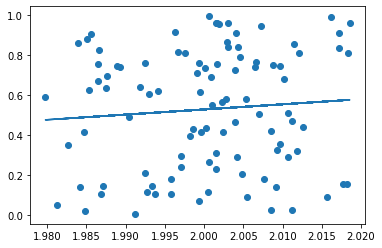

In [99]:
## Plot the training points from matrix Y and predicted values in the form of scatter graph

plt.scatter(X[:,1:2],Y)
plt.plot(X[:,1:2],Y_predicted)

In [100]:
## In the end use numpy.linalg lstsq to replace the original way we used for learning values of β0 and β1

newbetas = np.linalg.lstsq(X,Y, rcond = None)[0]
newbetas

array([[-4.62064205],
       [ 2.57426268]])